# <center style='color:orange'> Save multiple plots in one figure using Matplotlib </center>

## 1. Import required libraries

In [1]:
import torchvision
import torchvision.datasets as datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Load `MNIST` dataset 

In [2]:
training_dataset = datasets.MNIST(root='./data_src', train=True, download=True)
test_dataset = datasets.MNIST(root='./data_src', train=False, download=True)

100%|███████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 60799292.28it/s]


Extracting ./data_src/MNIST/raw/train-images-idx3-ubyte.gz to ./data_src/MNIST/raw



100%|███████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 69458540.04it/s]

Extracting ./data_src/MNIST/raw/train-labels-idx1-ubyte.gz to ./data_src/MNIST/raw




100%|███████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 26335919.23it/s]


Extracting ./data_src/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data_src/MNIST/raw



100%|█████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 56362511.15it/s]

Extracting ./data_src/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data_src/MNIST/raw



## 3. Create dataframes using the labels

In [3]:
training_labels = training_dataset.targets
test_labels = test_dataset.targets

In [4]:
df1 = pd.DataFrame(training_labels, columns=['Training Labels'])
df2 = pd.DataFrame(test_labels, columns=['Test Labels'])

In [5]:
df1.head()

,Training Labels
0,5
1,0
2,4
3,1
4,9


In [6]:
df2.head()

,Test Labels
0,7
1,2
2,1
3,0
4,4


In [7]:
df1[df1['Training Labels'] == 0].head()

,Training Labels
1,0
21,0
34,0
37,0
51,0


In [8]:
df2[df2['Test Labels'] == 0].head()

,Test Labels
3,0
10,0
13,0
25,0
28,0


In [9]:
df1[df1['Training Labels'] == 0].head(6).index

Int64Index([1, 21, 34, 37, 51, 56], dtype='int64')

In [10]:
df2[df2['Test Labels'] == 0].head(6).index

Int64Index([3, 10, 13, 25, 28, 55], dtype='int64')

## 4. Display the digits horizontally

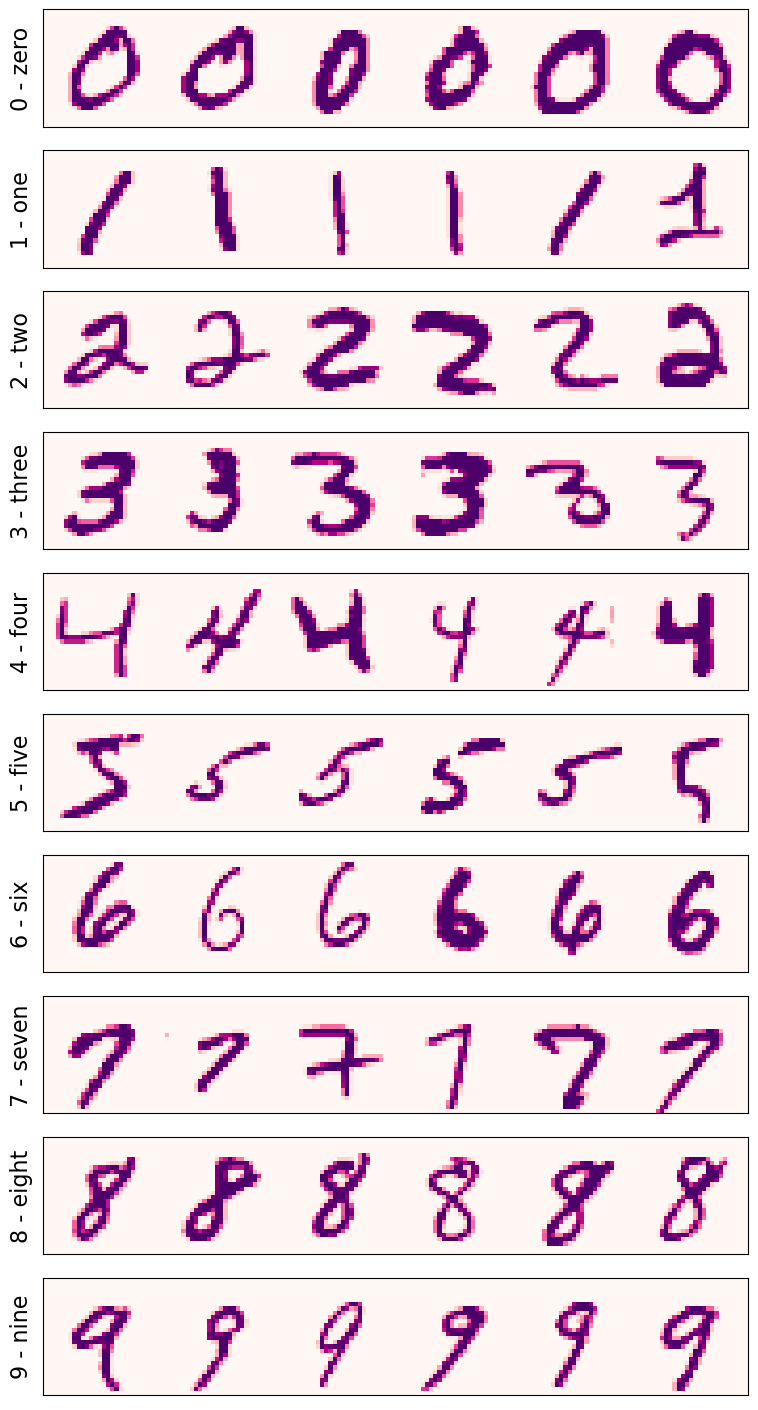

In [11]:
fig, ax = plt.subplots(nrows=10, ncols=1, figsize=(10, 18))

for a in range(10):
    _extract_ = df1[df1['Training Labels'] == a].head(6).index
    extract = list(_extract_)
    select = []
    for i in extract:
        select.append(training_dataset.data[i])
    digits = np.concatenate(select, axis=1)
    ax[a].imshow(digits, cmap='RdPu')
    ax[a].set_xticks([])
    ax[a].set_yticks([])
    ax[a].set_ylabel(training_dataset.classes[a], fontsize=16)

## 5. Display the digits vertically

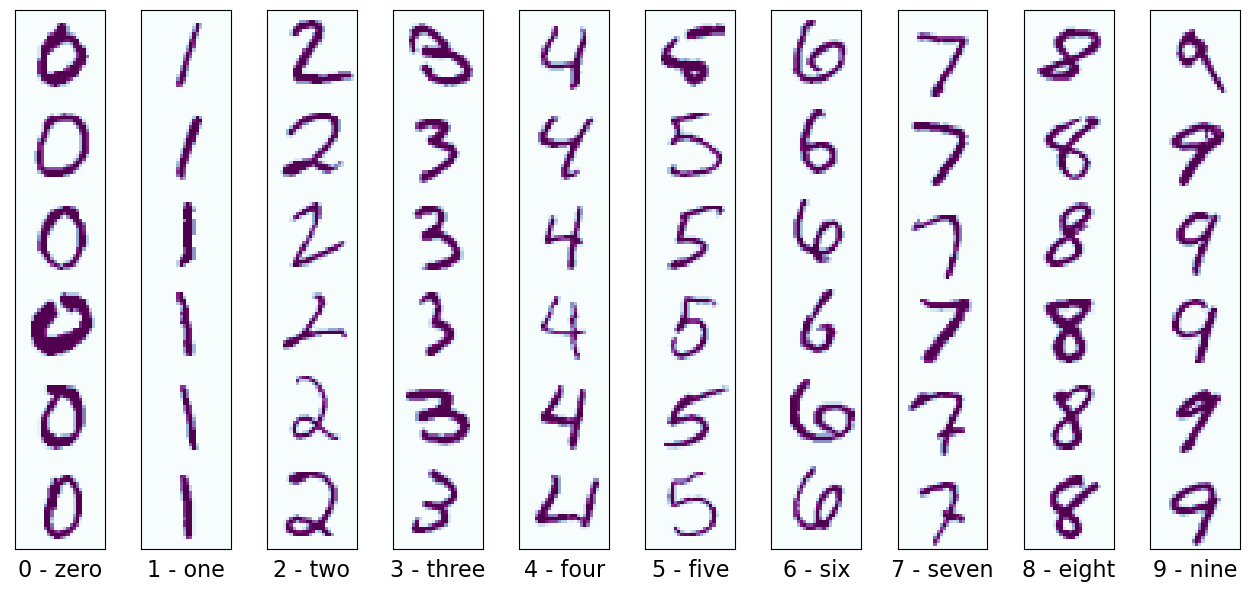

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(16, 7))

for a in range(10):
    _extract_ = df2[df2['Test Labels'] == a].head(6).index
    extract = list(_extract_)
    select = []
    for i in extract:
        select.append(test_dataset.data[i])
    digits = np.concatenate(select, axis=0)
    ax[a].imshow(digits, cmap='BuPu')
    ax[a].set_xticks([])
    ax[a].set_yticks([])
    ax[a].set_xlabel(test_dataset.classes[a], fontsize=16)